In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# LOADING THE DATA - AIR QUALITY
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes - splitting it in half
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

# Xtrain2 based on these new adjustments!!!!!!!!!

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3

# Like Xtrain2, setting Xtest2 with these new coefficients

X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.


In [3]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [4]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


# Assignment Goal:

Create a plot of how R2 varies across different values of lambda for both ridge and lasso.

Use Xtrain2 feature set above for lasso, and use similar code with the Xtrain2 set for ridge regression.

Question: do Lasso and ridge yield the same R2 for a given lambda value????

In [22]:
# x = lambda value, y = R2 value

# going to set lambda values for both ridge and lasso - 
# will use many points 

lambdavalues = [.35, .5, .75, 1, 1.5, 2, 2.5, 4, 
                7.5, 10, 15, 20, 35, 42.5, 50]

lasso_r_squared = []

# doing lasso first
for i in lambdavalues:
    lass = linear_model.Lasso(alpha=i)
    lassfit = lass.fit(X_train2, Y_train)
    lasso_r_squared.append(lassfit.score(X_train2, Y_train))
    

In [23]:
# doing same for ridge

ridge_r_squared = []

for i in lambdavalues:
    ridge = linear_model.Ridge(alpha=i, fit_intercept=False)
    ridgefit = ridge.fit(X_train2, Y_train)
    ridge_r_squared.append(ridgefit.score(X_train2, Y_train))

C:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.446568e-17
  overwrite_a=True).T
C:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.244324e-17
  overwrite_a=True).T


In [24]:
# setting up dataframes because seaborn is finnecky

graphlasso = pd.DataFrame({'lambda':lambdavalues, 'R Squared':lasso_r_squared})
graphridge = pd.DataFrame({'lambda':lambdavalues, 'R Squared':ridge_r_squared})

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


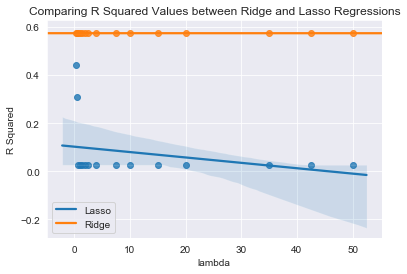

In [25]:
sns.set_style('darkgrid')

sns.regplot(x='lambda', y='R Squared', data=graphlasso)
sns.regplot(x='lambda', y='R Squared', data=graphridge)
plt.legend(['Lasso', 'Ridge'])
plt.title('Comparing R Squared Values between Ridge and Lasso Regressions')
plt.show()

In [32]:
# it seems with higher lambda values, i.e., >1, 
# lasso becomes relatively useless

# trying it again but with new lambda values
lambdavalues2 = [0.01, 0.025, .05, .1, .25, .35, .45, .55, 
                .65, .7, .75, .8, .85, .9, 1]

lasso_r_squared2 = []

# doing lasso first
for i in lambdavalues2:
    lass = linear_model.Lasso(alpha=i)
    lassfit = lass.fit(X_train2, Y_train)
    lasso_r_squared2.append(lassfit.score(X_train2, Y_train))

ridge_r_squared2 = []

for i in lambdavalues2:
    ridge = linear_model.Ridge(alpha=i, fit_intercept=False)
    ridgefit = ridge.fit(X_train2, Y_train)
    ridge_r_squared2.append(ridgefit.score(X_train2, Y_train))

C:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.822550e-18
  overwrite_a=True).T
C:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.558726e-18
  overwrite_a=True).T
C:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.125420e-18
  overwrite_a=True).T
C:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.828186e-17
  overwrite_a=True).T
C:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:

In [33]:
graphlasso2 = pd.DataFrame({'lambda':lambdavalues2, 'R Squared':lasso_r_squared2})
graphridge2 = pd.DataFrame({'lambda':lambdavalues2, 'R Squared':ridge_r_squared2})

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


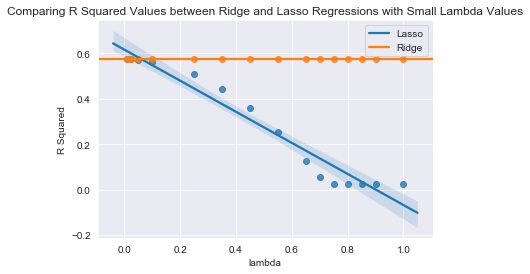

In [34]:
sns.set_style('darkgrid')

sns.regplot(x='lambda', y='R Squared', data=graphlasso2)
sns.regplot(x='lambda', y='R Squared', data=graphridge2)
plt.legend(['Lasso', 'Ridge'])
plt.title('Comparing R Squared Values between Ridge and Lasso Regressions with Small Lambda Values')
plt.show()

### Answer to Question:

R Squared values drop off for lasso regression when the penalty lambda becomes too large (apparently here, when lambda exceeds .25). This suggests that ridge is appropriate due to high collinearity but the feature space size is not a concern when using this particular dataset.